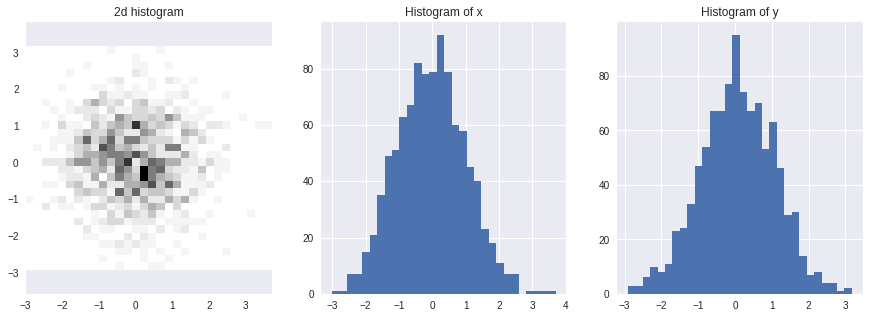

In [45]:
#Random normal generator
n = 1000
u1, u2 =-1+2*np.random.rand(2, n)
mask=(u1**2+u2**2)>1
while (np.any(mask)==True):
    u11, u22 =-1+2*np.random.rand(2, n)
    u1[mask]=u11[mask]
    u2[mask]=u22[mask]
    mask=(u1**2+u2**2)>1
    

s=u1**2+u2**2
r = np.sqrt(-2 * np.log(s)/s)
x=u1*r
y=u2*r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()



Доказательство: Пусть 𝑈1∽𝑅(0,1), 𝑈2∽𝑅(0,1). Обозначим 𝑋=√(−2𝑙𝑛𝑈2)*cos(2𝜋𝑈1), 𝑌=√(−2𝑙𝑛𝑈2)*sin(2𝜋𝑈1). 
Тогда 𝑋^2+𝑌^2=−2𝑙𝑛𝑈2 ∽ 𝐸𝑥𝑝(1/2), что эквивалентно распределению Хи квадрат с двумя степенями свободы. Случайный вектор (2𝜋𝑈1,√(−2𝑙𝑛𝑈2)) рассмотрим в поялрных координатах. 
Квадрат полярного радиуса распределен экспоненциально,а полярный угол равномерно. Отсюда следует, что его плотность
совпадает с двумерным гауссовским вектором. Тогда нужные величины: 𝜉1=√(−2𝑙𝑛𝑆)*𝑋/√𝑆, 𝜉2=√(−2𝑙𝑛𝑆)*𝑌/√𝑆. 𝜉1,𝜉2~𝑁(0,1) (𝑋/√𝑆 и 𝑌/√𝑆 - косинусы и синусы
соответствующего угла) Мы получили гаусовсккий вектор в декартовых координатах 𝑥∽𝑁(0,1) и 𝑦∽𝑁(0,1).

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'blue'
    colors[narr] = 'red'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()
    
    

In [0]:
Описание применение МСМС к задаче оценки E𝑛(𝜉) :

1) Выбираем случайным образом 𝑣∈𝑉.

2) Затем Y ∽ Bern(1/2). И смотрим как ведет себя Y: eсли Y = 1 и 𝑋𝑛(𝑤)=0 для всех соседних с 𝑣 вершин, то 𝑋𝑛+1(𝑣)=1. Иначе 𝑋𝑛+1(𝑣)=0.

3) Для остальных вершин 𝑤 оставляем значение таким же, т.е. 𝑋𝑛+1(𝑤)=𝑋𝑛(𝑤).

4) Для всех соседей Xn+1 = Xn , получившаяся Марковская цепь неприводима , так как мы можем достичь все конфигурации за конечное время. 
Данная Марковская цепь апериодична.Теперь мы покажем обратимость, откуда будет следовать и стационарность . 
Таким образом, необходимо показать обратимость 𝜇𝐺. Это очевидно будет следовать из следующего равенства:

                                      𝜇𝐺(𝜉)𝑃𝜉,𝜉′=𝜇𝐺(𝜉′)𝑃𝜉′,𝜉

Оно очевидно, если 𝜉=𝜂. Они не могут различаться более, чем в двух вершинах, отсюда следует, что надо проверить случай,
когда они различаются в одной вершине. Но тогда обе части равенства равны 1/(2*𝑍𝐺|𝑉|). Для оценивания 𝐸𝑛(𝜉) мы вначале берём
произвольную допустимую сетку, затем даём время, чтобы распределение цепи сошлось к стационарному. 
Потом 𝐸𝑛(𝜉) приближаем законом больших чисел.


In [0]:
def is_ok(a, i, j):
    n = len(a)
    flag = True
    if i > 0 and a[i-1,j]:
        flag = False
    if i < n-1 and a[i+1,j]:
        flag = False
    if j > 0 and a[i,j-1]:
        flag = False
    if j < n-1 and a[i,j+1]:
        flag = False
    return flag

def gen(size):
    N = 500
    narr = np.array([False for i in range(size**2)]).reshape((size,size))
    
    for i in range(N):
        i, j = np.random.randint(0, size, 2)
        alpha = np.random.binomial(1, 0.5)
        if alpha == 1 and is_ok(narr, i, j):
            narr[i,j] = True
        elif alpha == 0:
            narr[i,j] = False
    
    return narr

def num_colored(a):
    return np.sum(a)

In [0]:
size = 25
N=1000
lst = np.array([num_colored(gen(size)) for i in range(N)])
a = gen(size)

In [43]:

np.mean(lst)

109.048

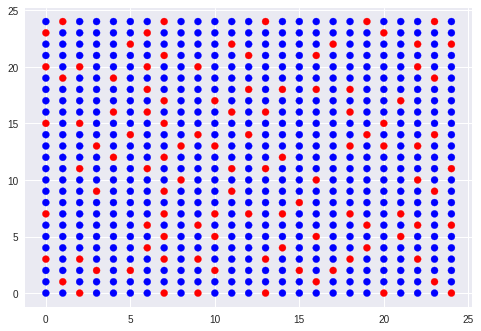

In [44]:
#plt.hist(lst, bins=50, normed=True, facecolor='g', alpha=0.75)
#plt.show()
plot_grid(a)